In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

## Extract features

In [9]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir='C://Work/DataScience/Data/PetImages/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
print(train_dir)

datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 20


C://Work/DataScience/Data/PetImages/train


In [12]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        color_mode="rgb",
        target_size = (150, 150),
        batch_size=batch_size,
        class_mode='binary'
    )
    print(generator.n)
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size: (i+1)*batch_size] = labels_batch
        i += 1
        if i*batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)



Found 2000 images belonging to 2 classes.
2000
Found 1000 images belonging to 2 classes.
1000
Found 1000 images belonging to 2 classes.
1000


array([[[[4.85752016e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 4.34649467e-01, 0.00000000e+00],
         [6.77352130e-01, 0.00000000e+00, 9.98424411e-01, ...,
          0.00000000e+00, 3.86022121e-01, 0.00000000e+00],
         [2.80903339e-01, 0.00000000e+00, 1.30284500e+00, ...,
          0.00000000e+00, 7.63859510e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 3.11002851e-01, ...,
          0.00000000e+00, 7.85706520e-01, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          2.74700731e-01, 3.67850065e-01, 0.00000000e+00],
         [1.26535118e-01, 0.00000000e+00, 7.22231865e-01, ...,
          4.69281487e-02, 3.05758119e-02, 0.00000000e+00],
         [6.44683093e-02, 0.00000000e+00, 1.49969065e+00, ...,
          3.48314419e-02, 8.61231089e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 8.72698069e-01, ...,
          0.00000000e+00, 7.61373818e-01, 0.00000000e+00]],

        [[3.98657620

In [19]:
train_features.shape

(2000, 4, 4, 512)

In [21]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

## Train classifier

In [23]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, 
                    train_labels, 
                    epochs=10, 
                    batch_size=20, 
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/10
2000/2000 [==============================] - 5s 3ms/step - loss: 1.0275 - acc: 0.7345 - val_loss: 0.3247 - val_acc: 0.8640
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3543 - acc: 0.8440 - val_loss: 0.3029 - val_acc: 0.8730
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2855 - acc: 0.8780 - val_loss: 0.2794 - val_acc: 0.8880
Epoch 4/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2488 - acc: 0.8970 - val_loss: 0.2614 - val_acc: 0.9000
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2319 - acc: 0.9075 - val_loss: 0.2759 - val_acc: 0.9000
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1912 - acc: 0.9290 - val_loss: 0.3112 - val_acc: 0.8880
Epoch 7/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1806 - acc: 0.9290 - val_loss: 0.3839 - val_acc: 0.8800
Epoch 8/10
200

## Charts

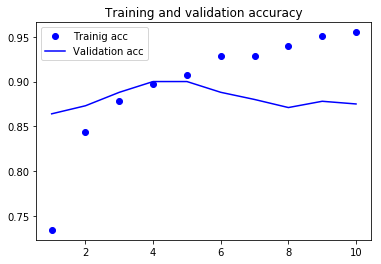

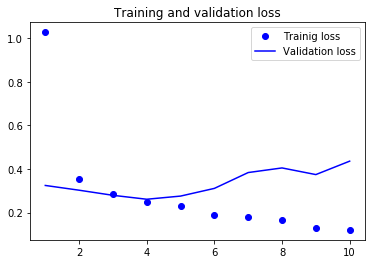

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Trainig acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Trainig loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()